# Aspie Score 

The [Aspie Score](http://www.rdos.net/eng/) is derived from a test written and maintained by a researcher, Leif Ekblad, with a MSc in Science from LTH Lund in Sweden. The first version of the test was uploaded on in October of 2007 and there has been around four versions since then. 


The quiz consists of 160 questions that are weighted by the following factors:
- Aspie loading 
- Nueurotypical Loading 
- Aspie score
- Aspergers Syndrome Score
- Young Aspier Score
- Mixed Score
- Nuerotypical Score

All of the above factors have both a male and female weighted score (based on the statstical details input prior to starting the quiz).

Each question is answered on a scale of ? to 2 where:
- ? stands for 'Don't Know'
- 0 is no/never
- 1 is a little
- 2 is yes/often

My goal is to complete the quiz every 12 months and to compare it to previous results. So far I have data for the following dates: Nov 2018, Jan 2020, Dec 2020.

In [135]:
#Load necessary packages
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import os

In [136]:
#set directory
os.chdir(r'C:\Users\Jarrod\Documents\Fitness & Health\Personality Tests')

In [172]:
#Code from https://matplotlib.org/gallery/specialty_plots/radar_chart.html
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [138]:
# data = [['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3'],
#         ('Basecase', [
#             [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
#             [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
#             [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
#             [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
#             [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]])]


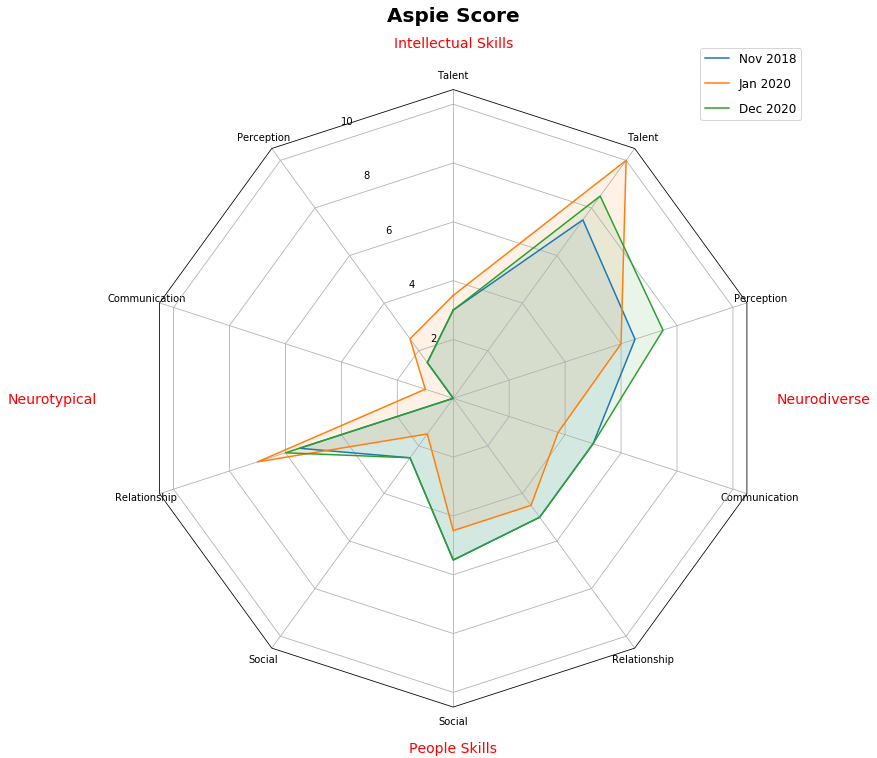

In [175]:
data = [['Talent', 'Perception', 'Communication', 'Relationship', 'Social', 'Social', 'Relationship', 'Communication', \
        'Perception', 'Talent'], 
        ('Aspie Score', [
            [3, 1.5, 0, 5.5, 2.5, 5.5, 5, 5, 6.5, 7.5],
            [3.5, 2.5, 1, 7, 1.5, 4.5, 4.5, 3.75, 6, 10],
            [3, 1.5, 0, 6, 2.5, 5.5, 5, 5, 7.5, 8.5]])]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)
fig.set_size_inches(18.5, 10.5)

ax.set_rgrids([2, 4, 6, 8, 10])
ax.set_title(title,  position=(0.5, 1.1), ha='center', fontweight='bold', fontsize=20)

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.1)
ax.set_varlabels(spoke_labels)
labels = ('Nov 2018', 'Jan 2020', 'Dec 2020')
legend = ax.legend(labels, loc=(0.9, 0.95), labelspacing=1, fontsize='large')

#Add annotations for each side of the plot
ax.annotate('Neurotypical',
            xy=(-0.15, 0.45), xytext=(0, 10),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=14, ha='center', va='bottom', color='red')
ax.annotate('People Skills',
            xy=(0.5, -0.01), xytext=(0, 10),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=14, ha='center', va='bottom', color='red')
ax.annotate('Neurodiverse',
            xy=(1.1, 0.45), xytext=(0, 10),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=14, ha='center', va='bottom', color='red')
ax.annotate('Intellectual Skills',
            xy=(0.5, 0.92), xytext=(0, 10),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=14, ha='center', va='bottom', color='red')
plt.tight_layout()
plt.savefig('aspie_score.jpg', bbox_inches='tight', format='jpg')
plt.show()